
# Differential Equation Solving 1

Notebook to implement Euler, Midpoint and Euler Trapezium methods to solve differential equations. Designed to support Abertay University undergrad course MAT301 (JT, 2022).

## Motivation
A **differential equation** is a relationship between a function, $f(x)$, its independent variable, $x$, and any number of its derivatives. An **ordinary differential equation** or **ODE** is a differential equation where the independent variable, and therefore also the derivatives, is in one dimension. For our purposes, we can assume that an ODE can be written

$$
F\left(x, f(x), \frac{{\rm d}f(x)}{{\rm d}x}, \frac{{\rm d}^2f(x)}{{\rm d}x^2}, \frac{{\rm d}^3f(x)}{{\rm d}x^3}, \ldots, \frac{{\rm d}^{n-1}f(x)}{{\rm d}x^{n-1}}\right) = \frac{{\rm d}^{n}f(x)}{{\rm d}x^{n}},
$$

where $F$ is an arbitrary function that incorporates one or all of the input arguments, and $n$ is the **order** of the differential equation. This equation is referred to as an **$n^{\mathrm{th}}$ order ODE**.


<img src="https://pythonnumericalmethods.berkeley.edu/_images/22.01.01-pendulum.png" alt="Pendulum system" title="Pendulum system." width="200"/>

One example of an ODE describes the system in the above picture, containing a pendulum of length $l$ supporting a mass, $m$ at the end of its length. The angle the pendulum makes with the vertical axis over time, $\theta(t)$, in the presence of gravity, $g$, can be described by an equation, which is the ODE

$$
ml\frac{{\rm d}^2\theta(t)}{{\rm d}t^2} = -mg \sin(\theta(t)).
$$

This equation can be derived by summing the forces in the $x$ and $y$ direction, and then converting to polar coordinates.

We have learned several simple approaches to solving ODEs in lectures:


1.   Euler's method.
2.   Midpoint method.
3.   Euler Trapezium.

This notebook will apply each of these methods to a specific problem, to illustrate how they can be implemented numerically. Remember that MAT301 aims to give you a mathematical underpinning of each of these methods.


#### Setting up Libraries

As always, we'll make use of some clever Python tools for plotting and maths, so our first step is to load in the libraries that store these tools:

In [1]:
## Libraries
%matplotlib inline
import numpy as np
import math 
import matplotlib.pyplot as plt 

## Euler's method

Let $\frac{dS(t)}{dt} = F(t,S(t))$ be an explicitly defined first order ODE. That is, $F$ is a function that returns the derivative at a given time. Also, let $t$ be a numerical grid of the interval $[t_0, t_f]$ with spacing $h$. Assuming that $t_0 = 0$, and that $t_f = Nh$ for some positive integer, $N$, we can linearly approximate $S(t)$ around $t_j$ at $t_{j+1}$ as:

$$
S(t_{j+1}) = S(t_j) + (t_{j+1} - t_j)\frac{dS(t_j)}{dt},
$$

which can also be written

$$
S(t_{j+1}) = S(t_j) + hF(t_j, S(t_j)).
$$

This formula is called the **Explicit Euler Formula**, and allows us to approximate the state at $S(t_{j+1})$ given the state at $S(t_j)$. Starting from a given initial value of $S_0 = S(t_0)$, we can use this formula to integrate the states up to $S(t_f)$; these $S(t)$ values are then an approximation for the solution of the differential equation. The Explicit Euler formula is the simplest and most intuitive method for solving initial value problems. At any state $(t_j, S(t_j))$ it uses $F$ at that state to "point" toward the next state and then moves in that direction a distance of $h$. Although there are more sophisticated and accurate methods for solving these problems, they all have the same fundamental structure. As such, we enumerate explicitly the steps for solving an initial value problem using the Explicit Euler formula.

<img src="https://pythonnumericalmethods.berkeley.edu/_images/22.03.01-Euler-method-illustration.png" alt="explicit Euler" title="The illustration of the explicit Euler method." width="500"/>

Lets go ahead and see this in action, using the equation and question posed in from Example 9.1 in the lectures:

$$
\frac{{\rm{d}}y}{{\rm{d}}t}=xy,
$$

requires a solution at $x=0.5$ subject to the initial condition $y(x=0)=1$, using a step size $h=0.1$.

Euler's method requires the re-evaluation of the right hand side of the function at different positions, so lets go ahead and create a function to return this value

In [2]:
def func(x,y):
    ftw = x * y
    return ftw

Now we need to create our $x$-range for the problem. We know that the range has to begin at $x=0$ (because we know what $y$ is there), and we have to step along until we reach the desired $x$-value ($x=0.5$) in steps of $h=0.1$:

In [3]:
a = 0.0
b = 0.5
h = 0.1
N = int( (b - a) / h ) # number of steps
print("N=", N)
x = np.arange( a, b + h, h)  # range of x
print("x=", x)

N= 5
x= [0.  0.1 0.2 0.3 0.4 0.5]


You can see that this approach generates 5 steps $N=5$, and the $x$ values are exactly what we would expect them to be using pen and paper.

For each of these $x$-values, we'll now have to create $y$-values. The first of these is already specified in the problem; we have been told the initial condition $y(0)=1$.

In [4]:
y = np.zeros(len(x))
y[0] = 1

Now we need to calculate each $y$-value based on the previous value. To help us, we can loop over all the $x$-values and calculate the next in the sequence. The final value will be the one we need (the $n$th):

In [5]:
for n in range(0, N):
    y[n+1] = y[n] + h * func(x[n], y[n])
print("y=", y)

y= [1.         1.         1.01       1.0302     1.061106   1.10355024]


This differential equation has an exact solution, $y_{\rm{exact}}=\exp{\left(\frac{x^2}{2}\right)}$, so lets go ahead and compare how our approximation does:

In [6]:
y_exact = np.exp(0.5 * x * x)
print(y_exact)

[1.         1.00501252 1.02020134 1.04602786 1.08328707 1.13314845]


Our approximate solution seems to be behaving in the same way: lets visualise this with a plot:

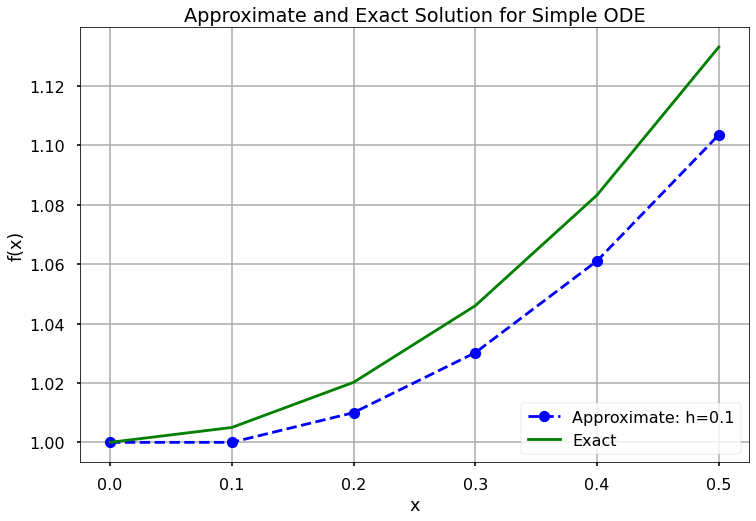

In [7]:
plt.style.use('seaborn-poster')
plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo--', label='Approximate: h=%s'%(h))
plt.plot(x, np.exp(0.5 * x * x), 'g', label='Exact')
plt.title('Approximate and Exact Solution for Simple ODE')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

So we see that our approximation displays similar behaviour, but doesn't follow the trend exactly; in fact the graphs appear to be diverging as $x$ increases. What if we make the step size ten times smaller?

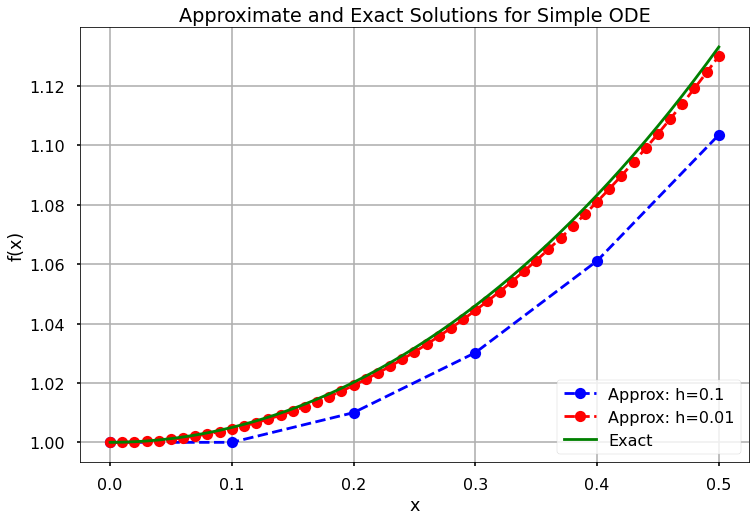

In [8]:
h2 = 0.01
N2 = int( (b - a) / h2) # number of steps
x2 = np.arange( a, b + h2, h2)  # range of x
y2 = np.zeros(len(x2))
y2[0] = 1
for n in range(0, N2):
    y2[n + 1] = y2[n] + h2 * func(x2[n], y2[n])
plt.style.use('seaborn-poster')
plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo--', label='Approx: h=%s'%(h))
plt.plot(x2, y2,'ro--', label='Approx: h=%s'%(h2))
plt.plot(x2, np.exp(0.5 * x2 * x2), 'g', label='Exact')
plt.title('Approximate and Exact Solutions for Simple ODE')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

As expected, cranking up the number of steps improves the accuracy of the solution. However, in practice, we often have a finite amount of numerical resources (e.g. CPU speed, number of nodes, memory size), so we can't always rely on the ability to simply decrease $h$. In those cases, we have to be smarter, and apply other techniques.

## Midpoint method

In the lectures, we were introduced to a more accurate scheme, the Midpoint method. This essentially estimates the gradient of the tangent at the midpoint between steps $x_n+\frac{1}{2}h$, which lies halfway between $x_n$ and $x_{n+1}$. Using Euler's method, we then determine \begin{equation}y_{n+1}=y_n+hk_2,\end{equation}where
$$
\begin{align}
k_1&=f(x_n,y_n) \\
k_2&=f(x_n+\frac{1}{2}h, y_n+\frac{1}{2}hk_1).
\end{align}
$$

This looks a bit weird, but all this means is that we start to evaluate the function not only at the grid point values, but also now at different locations in $x$ and $y$.

Let's go ahead and implement this, in exactly the same manner as the previous method:

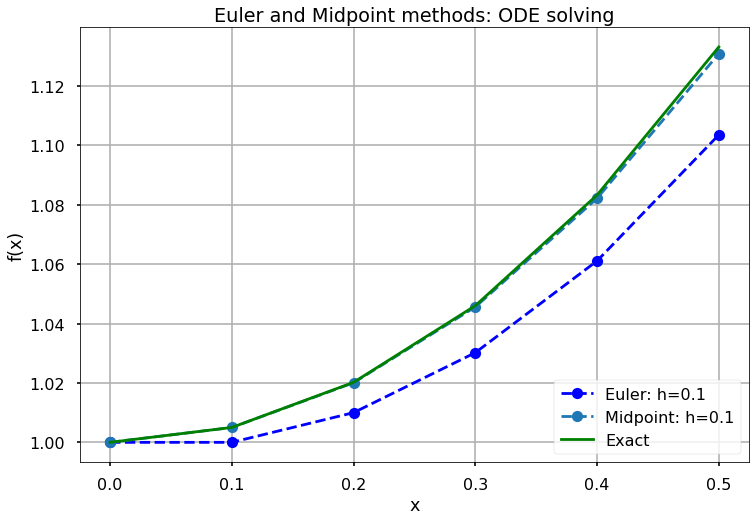

In [9]:
y3 = np.zeros(len(x))
y3[0] = 1
for n in range(0, N):
    k1 = func(x[n],y[n])
    k2 = func(x[n] + 0.5 * h, y[n] + 0.5 * h * k1)
    y3[n + 1] = y3[n] + h*k2
plt.style.use('seaborn-poster')
plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo--', label='Euler: h=%s'%(h))
plt.plot(x, y3, 'o--', label='Midpoint: h=%s'%(h))
plt.plot(x, np.exp(0.5 * x * x), 'g', label='Exact')
plt.title('Euler and Midpoint methods: ODE solving')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

We quickly see that the midpoint method is more accurate than the Euler method for the same step size. The trade-off is the additional calculation required to evaluate $k_1$ and $k_2$.

### Modified Euler (Euler-Trapezium Method)

Our methods to solve ODE problems are gradually becoming more complicated in our search for better accuracy.

The final method we will encounter in this worksheet is the Modified Euler (or Euler Trapezium) method. This is classed as a predictor-corrector method, which uses the average of gradients of tangents at the endpoints of each interval to improve accuracy. The derivation of this method is beyond the scope of this course, but can easily be found in textbooks or online. The Modified Euler method is also an example of a 2nd order member of the family of Runge Kutta methods, developed around 1900 by Carl Runge and Wilhelm Kutta. We will see some higher order examples of these methods later.

The method uses Euler's method to predict $y_{n+1}$:

$$
y_{n+1}^p=y_n+h y_n',
$$

where $y_{n+1}^p$ is an initial prediction. We then use the derivative prediction, $y_{n+1}'^p$, from

$$
y_{n+1}'^p=f\left(x_{n+1}, y_{n+1}^p\right)
$$

to correct the value
$$
y_{n+1}^c=y_n+\frac{h}{2}\left(y_n'+y_{n+1}'^p\right).
$$

Once again, we can apply this solution to the ODE problem from earlier in the following way:

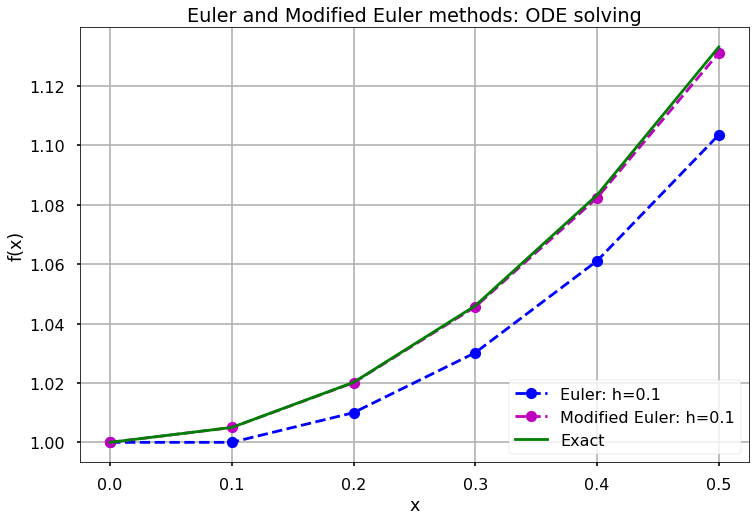

In [10]:
y4 = np.zeros(len(x))
y4[0] = 1
for n in range(0, N):
    k1 = func(x[n], y[n])
    k2 = func(x[n + 1], y[n] + h * k1)
    y4[n + 1] = y4[n] + 0.5 * h * (k1 + k2)
plt.style.use('seaborn-poster')
plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo--', label='Euler: h=%s'%(h))
plt.plot(x, y4, 'mo--', label='Modified Euler: h=%s'%(h))
plt.plot(x, np.exp(0.5 * x * x), 'g', label='Exact')
plt.title('Euler and Modified Euler methods: ODE solving')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

Once again, the Modified Euler does a much better job than the original Euler method, and (for this ODE) is comparable to the Midpoint method in accuracy.

In the next worksheet we will explore a common higher order scheme, the RK4 algorithm, which is widely used in science and engineering (for example). This algorithm builds on some of the simple approaches used in these less accurate models.

## Further work
Now its over to you:

Try choosing a different worked example seen in the lectures, or indeed a tutorial question **once you have worked through the mathematical steps** and see if you can apply the schemes in this workbook to that problem.
